## Part 1: Data Preprocessing

### Importing the libraries and dataset

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [135]:
dataset = pd.read_csv('churn_modelling.csv')

### Data Exploration

In [136]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [137]:
dataset.shape

(10000, 14)

In [138]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [139]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [140]:
len(dataset.select_dtypes(include='object').columns)

3

In [141]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [142]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

11

In [143]:
# statistical summary

dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Dealing with missing data

In [144]:
dataset.isnull().values.any()

False

In [145]:
dataset.isnull().values.sum()

0

### Encoding categorical data

In [146]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [147]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [148]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [149]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [150]:
# group by Geography
dataset.iloc[:,3:].drop('Gender',axis=1).groupby('Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [151]:
# Group by Gender
dataset.iloc[:,3:].drop('Geography',axis=1).groupby('Gender').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [152]:
X = dataset.iloc[:,3:-1] # Matrix of features
y = dataset.iloc[:,-1]   # dependent variable (vector)

In [153]:
# one hot encoding

X = pd.get_dummies(X,drop_first=True)

In [154]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


### Countplot

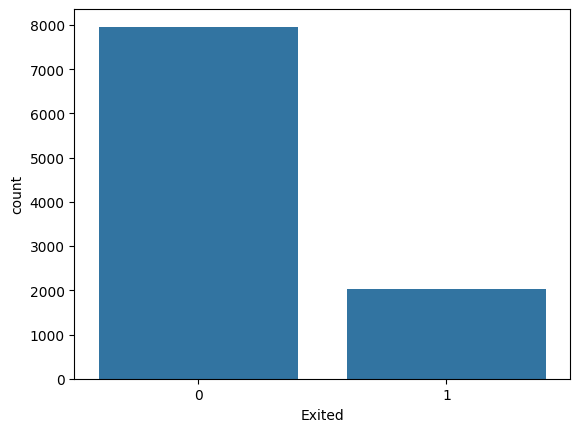

In [155]:
sns.countplot(x=y);

In [156]:
# 0 == customers staying with bank
# 1 == Exited customers
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

### Correlation Matrix and Heatmap

''

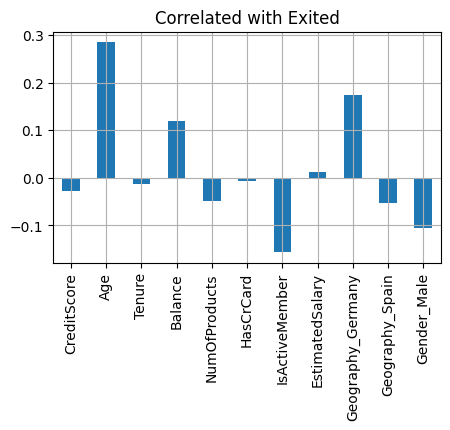

In [157]:
X.corrwith(y).plot.bar(rot=90,figsize=(5,3),title='Correlated with Exited',grid=True)
;

<Axes: >

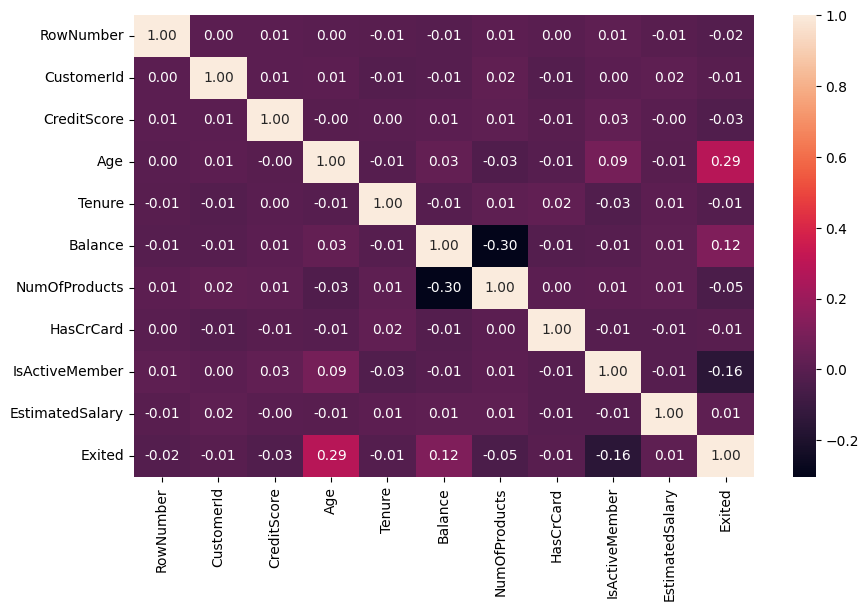

In [158]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(numeric_only = 1), annot=True,fmt='.2f')

### Splitting the dataset

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Scaling

In [160]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [161]:
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

## Part 2: Building the Model

### 1). Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [163]:
y_pred = lr_model.predict(X_test)

In [164]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [165]:
model = pd.DataFrame([acc,prec,rec,f1],columns=['LogisticRegression'],index=['accuracy','precision','recall','f1'])

In [166]:
model

,LogisticRegression
accuracy,0.811000
precision,0.581818
recall,0.237037
f1,0.336842


In [167]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


### Cross Validation

In [168]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator=lr_model,cv=10,scoring='accuracy',X=X_train, y=y_train)
print('Accuracy is: {:.2f} %'.format(np.mean(accuracy)*100))
print('Standard Deviation is: {:.2f}'.format(np.std(accuracy)))

Accuracy is: 80.85 %
Standard Deviation is: 0.01


### 2). Random Forest Classification

In [169]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [170]:
y_pred = rf_model.predict(X_test)

In [171]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [172]:
model1 = pd.DataFrame([acc,prec,rec,f1],columns=['Random Forest'],index=['accuracy','precision','recall','f1'])
model = pd.concat([model,model1],axis=1)

In [173]:
model

,LogisticRegression,Random Forest
accuracy,0.811000,0.865000
precision,0.581818,0.731959
recall,0.237037,0.525926
f1,0.336842,0.612069


In [174]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1517   78]
 [ 192  213]]


### Cross validation

In [175]:
accuracy = cross_val_score(estimator=rf_model,cv=10,scoring='accuracy',X=X_train, y=y_train)
print('Accuracy is: {:.2f} %'.format(np.mean(accuracy)*100))
print('Standard Deviation is: {:.2f}'.format(np.std(accuracy)))

Accuracy is: 86.02 %
Standard Deviation is: 0.01


### 3). XGBOOST

In [176]:
import xgboost as xgb

In [177]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [178]:
y_pred = xgb_model.predict(X_test)

In [179]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [180]:
model2 = pd.DataFrame([acc,prec,rec,f1],columns=['Xgboost'],index=['accuracy','precision','recall','f1'])
model = pd.concat([model,model2],axis=1)

In [181]:
model

,LogisticRegression,Random Forest,Xgboost
accuracy,0.811000,0.865000,0.852500
precision,0.581818,0.731959,0.670807
recall,0.237037,0.525926,0.533333
f1,0.336842,0.612069,0.594223


In [182]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1489  106]
 [ 189  216]]


### Cross Validation

In [183]:
accuracy = cross_val_score(estimator=xgb_model,cv=10,scoring='accuracy',X=X_train, y=y_train)
print('Accuracy is: {:.2f} %'.format(np.mean(accuracy)*100))
print('Standard Deviation is: {:.2f}'.format(np.std(accuracy)))

Accuracy is: 85.12 %
Standard Deviation is: 0.01


## Part 3: Randomised Search to find the best parameters (XGBoost)

In [184]:
from sklearn.model_selection import RandomizedSearchCV
params = {
        'learning_rate':[.05,.1,.15,.20,.25,.30],
        'max_depth':[3,4,5,6,7,8,9,10,11,12,15],
        'min_child_weight':[1,3,5,7],
        'gamma':[0.0,0.1,0.2,0.3,0.4],
        'colsample_bytree':[.3,.4,.5,.7]
}

random_cv = RandomizedSearchCV(estimator=xgb.XGBClassifier(),cv=10,scoring='accuracy',param_distributions=params,n_jobs=-1)

In [185]:
random_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='accuracy')

In [186]:
random_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [187]:
random_cv.best_score_

0.862125

## Part 4: Final Model (XGBoost Classifier)

In [189]:
xgb_classifier = xgb.XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, )
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [190]:
y_pred = xgb_classifier.predict(X_test)

In [191]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [192]:
model3 = pd.DataFrame([acc,prec,rec,f1],columns=['Final Xgboost'],index=['accuracy','precision','recall','f1'])
model = pd.concat([model,model3],axis=1)

In [193]:
model

,LogisticRegression,Random Forest,Xgboost,Final Xgboost
accuracy,0.811000,0.865000,0.852500,0.869500
precision,0.581818,0.731959,0.670807,0.795082
recall,0.237037,0.525926,0.533333,0.479012
f1,0.336842,0.612069,0.594223,0.597843


In [194]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1545   50]
 [ 211  194]]


### Cross Validation

In [195]:
accuracy = cross_val_score(estimator=xgb_model,cv=10,scoring='accuracy',X=X_train, y=y_train)
print('Accuracy is: {:.2f} %'.format(np.mean(accuracy)*100))
print('Standard Deviation is: {:.2f}'.format(np.std(accuracy)))

Accuracy is: 85.12 %
Standard Deviation is: 0.01


## Part 5: Predicting a Single Observation 

In [197]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [207]:
#single_obs = X.iloc[0,:].values

In [208]:
#single_obs = single_obs.reshape(1,-1)
single_obs = [[625,45,5,12500.01,1,0,1,101348.88,0,0,1]]

In [209]:
xgb_classifier.predict(sc.transform(single_obs))

array([0])